<a href="https://colab.research.google.com/github/komorimasashi/jinka-stat-a1/blob/main/R04_Graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **4. グラフィックス**

### **4.1 Rの作図機能の概要**

Rのグラフィックスシステムはデータの可視化に使われます．Rの可視化には大きく分けて`base R`グラフィックスと`ggplot2`という二つのアプローチがあります．これらは異なる哲学に基づいており，それぞれがユニークな特徴と利点を持っています．以下ではこれらの概要と基本的な使用方法を紹介します．

#### **4.1.1 Base R Graphics**

- **概要**: `base R`グラフィックスは，Rにデフォルトで備わっているグラフィックスシステムです．シンプルな構文で直感的にグラフを作成できるため，初学者にも扱いやすいです．

- **利点**:
  - Rをインストールするだけで使用できる。
  - 単純なプロットは非常に簡単に作成できる。
  - プロットの細かな調整が可能で、高度なカスタマイズが行える。
- **基本的な使用方法**:
  - `plot()`で散布図や折れ線グラフを作成。
  - `hist()`でヒストグラムを描画。
  - `boxplot()`で箱ひげ図を表示。
  - `barplot()`で棒グラフを作成。
  - グラフにタイトルや軸ラベルを追加するために`main`, `xlab`, `ylab`引数を使用。



#### **4.1.2 ggplot2**

- **概要**: `ggplot2`は、Leland Wilkinsonの"Grammar of Graphics"に基づいて設計されたパッケージで，非常に美しいグラフィックスを作成することが可能です．`ggplot2`では、グラフをレイヤーとして構築しdata， aesthetic mapping, geometry，scale，facetなどの要素を組み合わせていきます．
- **利点**:
  - 複雑な多層グラフも簡単に作成できる。
  - データのマッピングが直感的で見た目が美しいグラフが作成できる。
  - グラフの構造が一貫しているため学習後はさまざまなタイプのグラフを容易に作成できる。
- **基本的な使用方法**:
  - `ggplot()`関数でデータとエステティックマッピングを定義し、それにジオメトリ関数（例: `geom_point()`, `geom_histogram()`）を追加してグラフのタイプを指定。
  - `facet_wrap()`や`facet_grid()`でグラフをファセット化してデータのサブセットを並べて表示。
  - `theme()`関数でグラフの見た目を細かく調整。


- **Base R**から始めると、Rの基礎とグラフィックスの基本的な理解が深まります．シンプルなプロットからスタートして，徐々に複雑なカスタマイズに挑戦してみてください．**Base R Graphics**に関しては、Rの公式ドキュメントや、Rのヘルプファイル（例えば、`?plot`や`?barplot`）が参考になります．
- **ggplot2**は、より一貫性のある方法で複雑なグラフを作成する際に力を発揮します．`ggplot2`の学習を始める際には，まずその基本的な構成要素（aesthetic mapping, geometry，scale，facetなど）を理解することが重要です．簡単なグラフから始めて，徐々にレイヤーの追加やファセット化，カスタマイズを行うことで，`ggplot2`の強力な機能を段階的にマスターできるかもしれません．**ggplot2**については、Hadley Wickhamによる"[ggplot2: Elegant Graphics for Data Analysis](https://ggplot2-book.org/)"が参考になります．

ここでは、`base R`グラフィックスと`ggplot2`を使用した、いくつかの一般的な作図の実例とそのソースコードを紹介します．

### **4.2 散布図**


#### **4.2.1 Base R**
この**Base R**コードでは、`set.seed` 関数を使用して乱数のシード値を固定し，`runif `関数で0から1の範囲内でランダムな値を生成しています．`plot` 関数は、x と y のデータ点をプロットして散布図を描画します．この関数では、タイトル (`main`)、x 軸と y 軸の範囲 (`xlim`, `ylim`)、x 軸と y 軸のラベル (`xlab`, `ylab`)、そしてプロットする点の形 (`pch`) を指定しています。`pch = 16` は塗りつぶされた円を意味します．

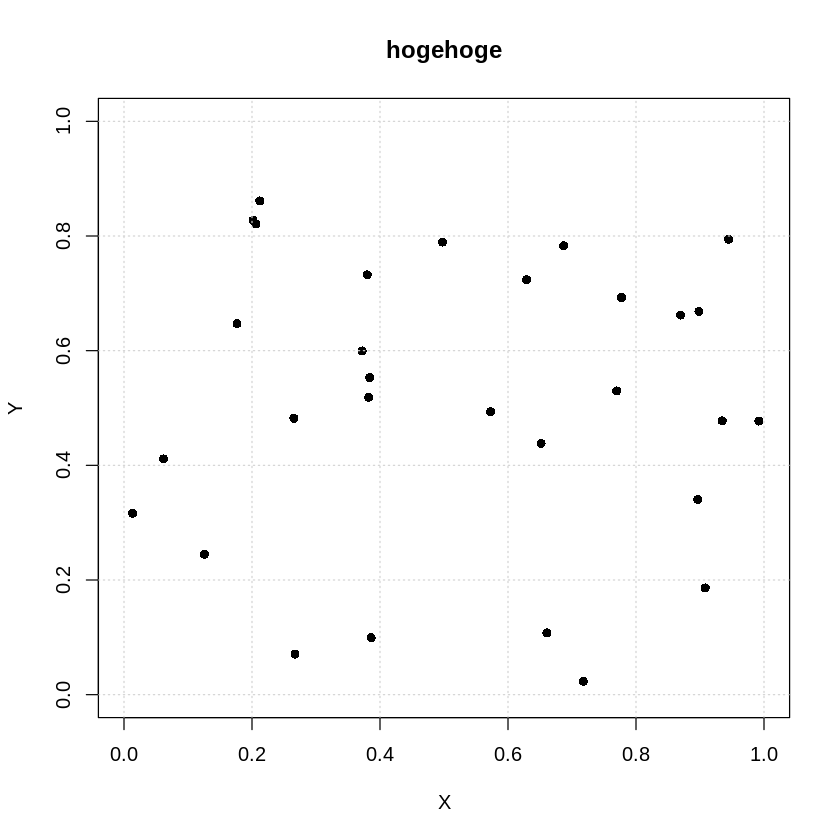

In [ ]:
# 乱数発生のシード値の固定
set.seed(0)
# 0から1の範囲で30個のランダムな数値を生成
x <- runif(30)
y <- runif(30)

# 散布図を描画
plot(x, y, main = "hogehoge", xlim = c(0.0, 1.0), ylim = c(0.0, 1.0), xlab = "X", ylab = "Y", pch = 16)
# グリッドを追加
grid()

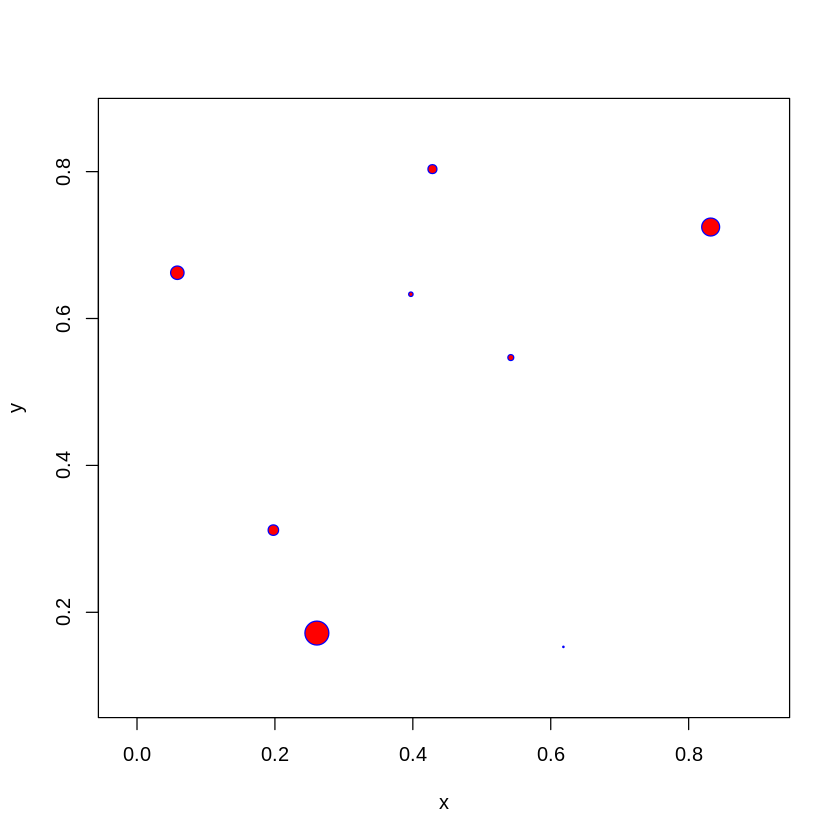

In [ ]:
#　バブルチャート
x <- runif(8)  # x軸のデータ（ランダム）
y <- runif(8)  # y軸のデータ（ランダム）
sizes <- c(1, 6, 4, 9, 16, 3, 7, 12)  # バブルの大きさ
symbols(x, y, circles = sizes, inches = 0.1, fg = "blue", bg = "red")  # バブルチャートの描画

#### **4.2.2 ggplot2**
まず、`ggplot2` パッケージをロードする必要があります．もしインストールされていない場合は、`install.packages("ggplot2")` を実行してインストールしてください．乱数の生成に関しては、基本的に先ほどのコードと変わりません。シード値を設定し、`runif` 関数でランダムな数値を生成します。ただし、`ggplot2` でプロットを作成する際には、これらの数値をデータフレームに格納するのが一般的です。

`ggplot2` を使用して散布図を作成するには、`ggplot` 関数にデータフレームを渡し、その後に具体的な描画方法を示す `geom_point()` を追加します。軸の範囲、ラベル、タイトルなどの追加オプションは `scale_x_continuous`, `scale_y_continuous`, `labs` などの関数で指定できます。
- `ggplot(df, aes(x = X, y = Y))`: 基本となるプロットを作成します。`aes` 関数は、軸に使用するデータの列を指定します。
- `geom_point(shape = 16)`: 点をプロットするために使用され、`shape = 16` は塗りつぶされた円を意味します。
- `scale_x_continuous` と `scale_y_continuous`: x 軸と y 軸の範囲とラベル名を設定します。
- `labs(title = "hogehoge")`: グラフのタイトルを設定します。
- `theme_minimal()`: シンプルな見た目のテーマを適用します。
- `theme(panel.grid.major = element_line(colour = "grey"), panel.grid.minor = element_blank())`: グリッド線を追加し、細かいグリッド線は非表示にします。


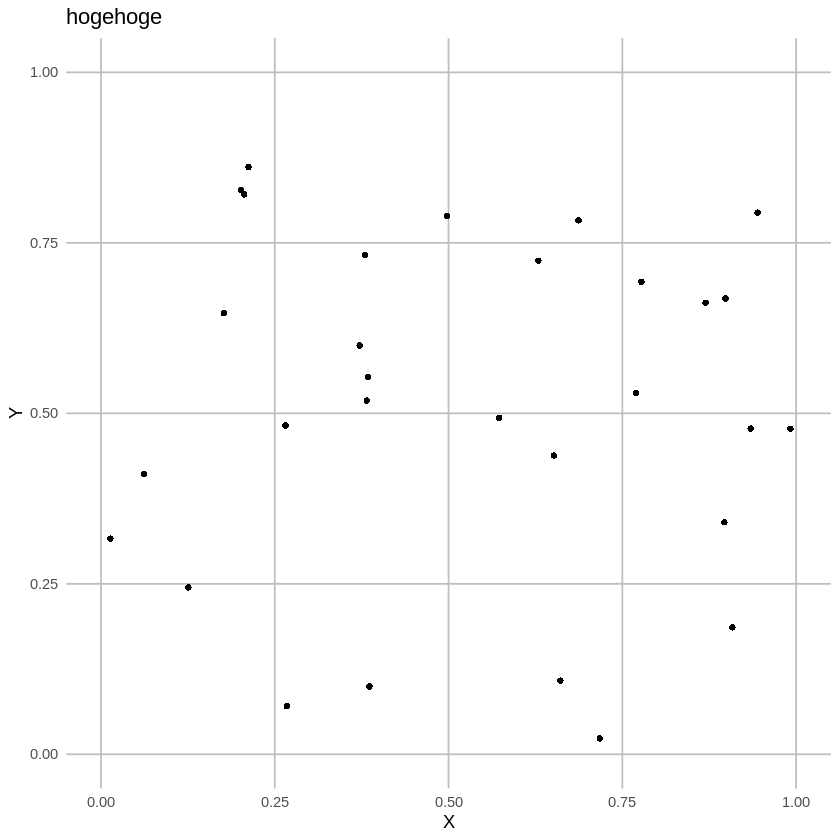

In [ ]:
library(ggplot2)

set.seed(0)
df <- data.frame(
  X = runif(30),
  Y = runif(30)
)

ggplot(df, aes(x = X, y = Y)) +
  geom_point(shape = 16) +
  scale_x_continuous(limits = c(0, 1), name = "X") +
  scale_y_continuous(limits = c(0, 1), name = "Y") +
  labs(title = "hogehoge") +
  theme_minimal() +
  theme(panel.grid.major = element_line(colour = "grey"),
        panel.grid.minor = element_blank())


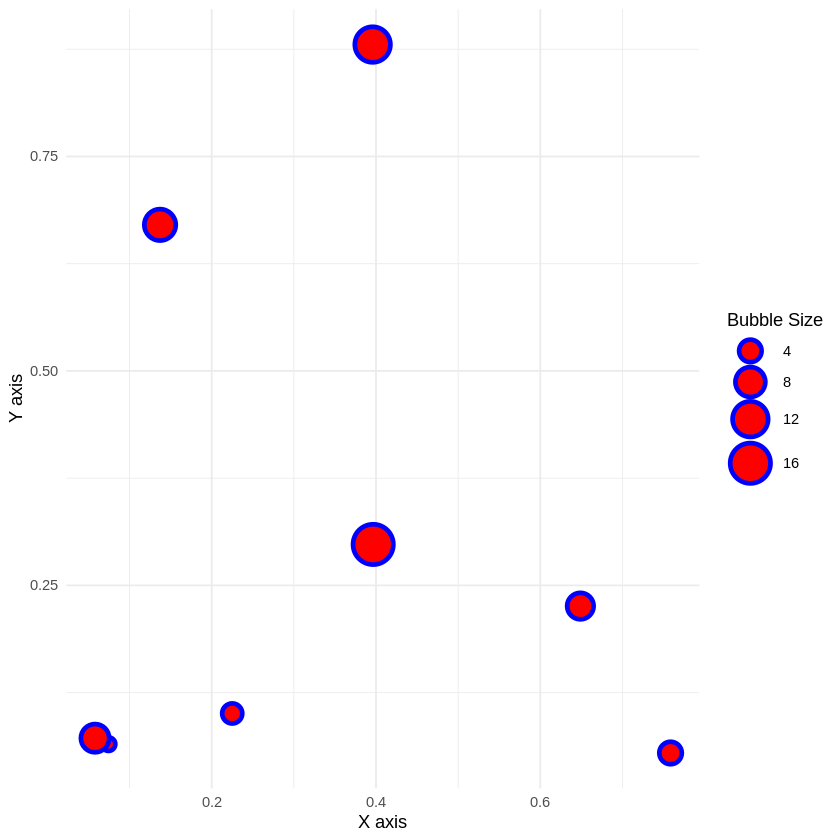

In [ ]:
#　バブルチャート
# ggplot2 ライブラリの読み込み
library(ggplot2)

# データフレームの作成
df <- data.frame(x = runif(8), y = runif(8), sizes = c(1, 6, 4, 9, 16, 3, 7, 12))

# ggplot2を使用してバブルチャートの描画
ggplot(df, aes(x = x, y = y, size = sizes)) +
  geom_point(shape = 21, colour = "blue", fill = "red", stroke = 2) +  # バブルの設定
  scale_size_area(max_size = 10) +  # バブルの最大サイズを設定
  theme_minimal() +  # シンプルなテーマを適用
  labs(x = "X axis", y = "Y axis", size = "Bubble Size")  # ラベルの設定


### **4.3 ヒストグラム**

#### **4.3.1 Base R**

このコードは、R 言語を使用して正規分布に従う乱数を生成し、その乱数を使ってヒストグラムを描画する一連の操作を行っています．

`set.seed` 関数は、乱数生成のための初期値（シード値）を設定します。シード値を指定することで、乱数の生成結果を再現可能にします。つまり、このシード値を使用して同じ乱数生成関数を実行すると、いつでも同じ乱数の列が生成されます。この例では、シード値に `123` を使用しています。

`rnorm` 関数は、指定された平均（`mean`）と標準偏差（`sd`）を持つ正規分布から乱数を生成します。この例では、平均 `2`、標準偏差 `1.5` の正規分布から `100` 個の乱数を生成し、それらを変数 `x` に割り当てています。

`hist` 関数は、指定されたデータのヒストグラムを描画します。`breaks`引数を指定することで，分割数をカスタマイズできます．さらに，この関数では、ヒストグラムのタイトル（`main`）、x 軸のラベル（`xlab`）、バーの色（`col`）、およびバーの境界線の色（`border`）を指定しています。この例では、ヒストグラムのバーは青色（`"blue"`）で、境界線は白色（`"white"`）です。

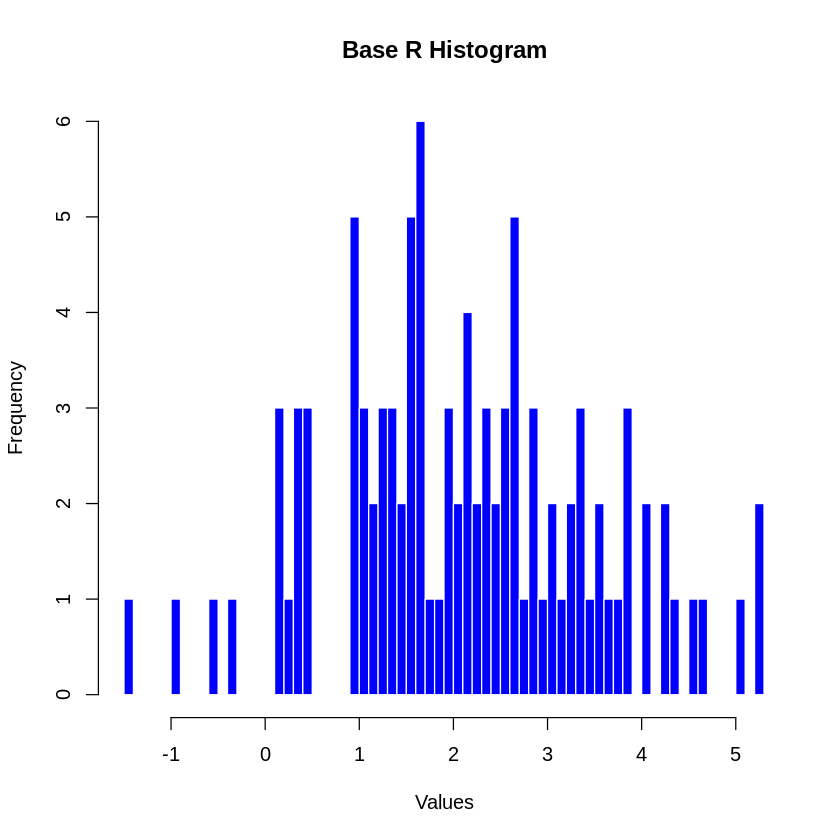

In [5]:
# 乱数生成
set.seed(123)  # 再現性のためのシード設定
x <- rnorm(100, mean = 2, sd = 1.5)  # 平均2、標準偏差1.5の正規分布に従う乱数

# ヒストグラムの描画
hist(x, breaks = 50, main = "Base R Histogram", xlab = "Values", col = "blue", border = "white")

また`breaks`引数にベクトルを与えると，ヒストグラムの横軸の範囲と分割の幅 (bin) を指定できます（下の例では，-3から7の範囲で，binが1のヒストグラムを描画しています）．

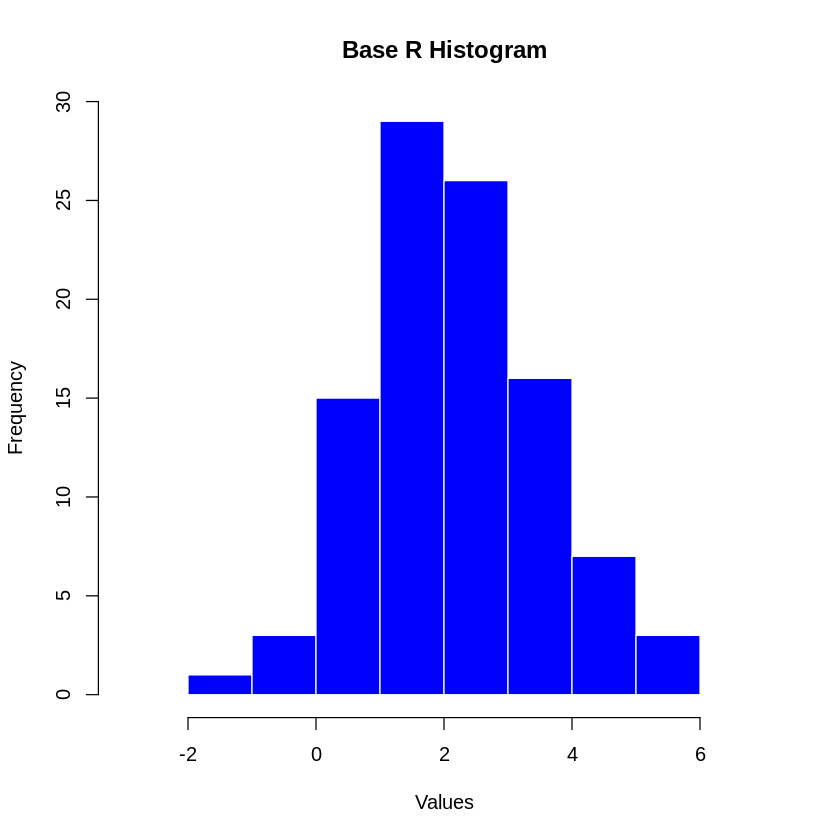

In [ ]:
# 乱数生成
set.seed(123)  # 再現性のためのシード設定
x <- rnorm(100, mean = 2, sd = 1.5)  # 平均2、標準偏差1.5の正規分布に従う乱数

# ヒストグラムの描画
hist(x, breaks = seq(-3,7,1), main = "Base R Histogram", xlab = "Values", col = "blue", border = "white")

#### **4.3.2 ggplot2**
ここで、`geom_histogram()` 関数はヒストグラムを描画するために使用されます。`binwidth` パラメーターはヒストグラムの各ビン（棒）の幅を指定し、この例では適切な値を選択するか、自動的に決定させるために省略することも可能です。`fill` と `color` パラメーターはそれぞれビンの塗りつぶし色と境界線の色を指定します。

`labs()` 関数はグラフのタイトルと軸ラベルを設定するために使用され、`theme_minimal()` はグラフのデザインをシンプルにするためのテーマを適用します。

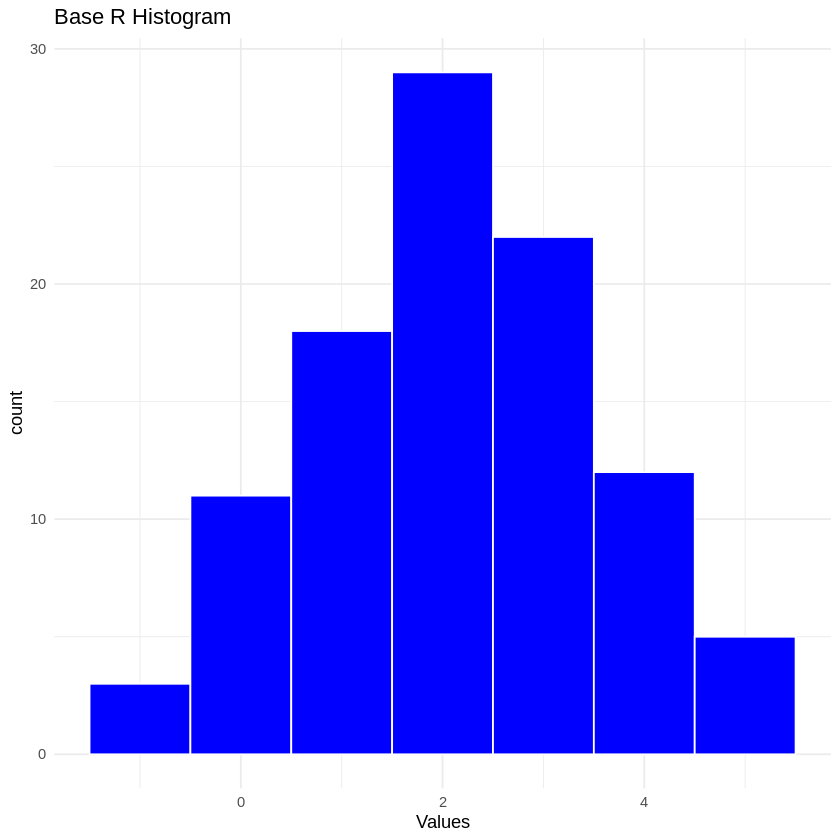

In [ ]:
# 必要なパッケージのロード
library(ggplot2)

# 乱数生成
set.seed(123)  # 再現性のためのシード設定
x <- rnorm(100, mean = 2, sd = 1.5)  # 平均2、標準偏差1.5の正規分布に従う乱数
df <- data.frame(Values = x)  # ggplot2で使用するためにデータフレームに変換

# ヒストグラムの描画
ggplot(df, aes(x = Values)) +
  geom_histogram(binwidth = 1.0, fill = "blue", color = "white") +
  labs(title = "Base R Histogram", x = "Values") +
  theme_minimal()  # シンプルなデザインのテーマを適用

### **4.4 箱ひげ図**

#### **4.4.1 Base R**
このコードでは、df_shopsales[, -1]を使ってmonth列（最初の列）を除外し、残りの数値列のみをboxplot関数に渡しています。namesパラメータを使用して、各箱ひげ図にラベルを付けています。main, xlab, ylabでグラフのタイトルと軸ラベルを設定し、colで箱ひげ図の色を指定しています。

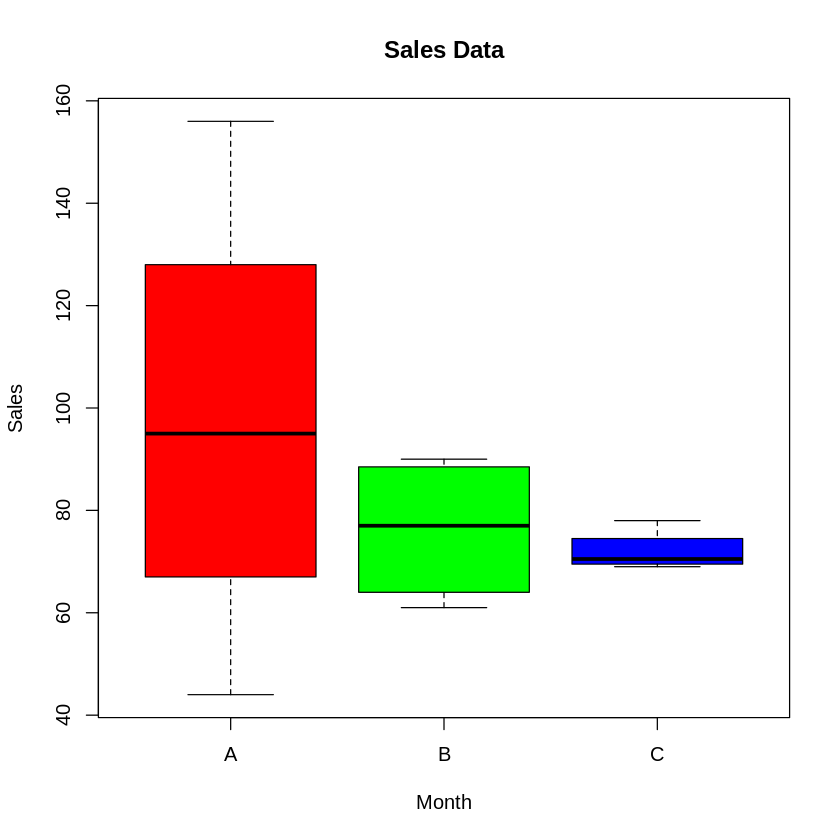

In [ ]:
# データフレームの作成
df_shopsales <- data.frame(month = c('Jan.', 'Feb.', 'Mar.', 'Apr.'),
                           A = c(156, 90, 100, 44),
                           B = c(67, 87, 61, 90),
                           C = c(78, 70, 71, 69))

# month列を除外して箱ひげ図を描画
boxplot(df_shopsales[, -1],  # 最初の列（month列）を除外
        names = c("A", "B", "C"),
        main = "Sales Data",
        xlab = "Month",
        ylab = "Sales",
        col = rainbow(3))  # 色を指定

#### **4.4.2 ggplot2**


- **パッケージのロード**: 最初に、`ggplot2` と `tidyr` パッケージをロードします。`ggplot2` はグラフィックスを描画するために、`tidyr` はデータの整形に使用します。

- **データフレームの作成**: 与えられたコードを使用してデータフレーム `df_shopsales` を作成します。これには月 (`month`) と各店舗 (`A`, `B`, `C`) の売上データが含まれます。

- **データを長い形式に変換**: `pivot_longer` 関数を使用して、データフレームを長い形式に変換します。これにより、`ggplot2` での箱ひげ図の描画が容易になります。`cols = -month` は `month` 列を除外することを意味し、`names_to = "Shop"` と `values_to = "Sales"` は、変換後の列の名前を指定します。

- **箱ひげ図の描画**: `ggplot` 関数に変換後のデータフレームを渡し、`aes` 関数で軸と塗りつぶしの変数を指定します。`geom_boxplot()` で箱ひげ図を描画し、`scale_fill_manual(values = rainbow(3))` で店舗ごとに異なる色を指定します。最後に、`labs` と `theme_minimal()` でグラフのタイトル、軸ラベル、およびテーマを設定します。

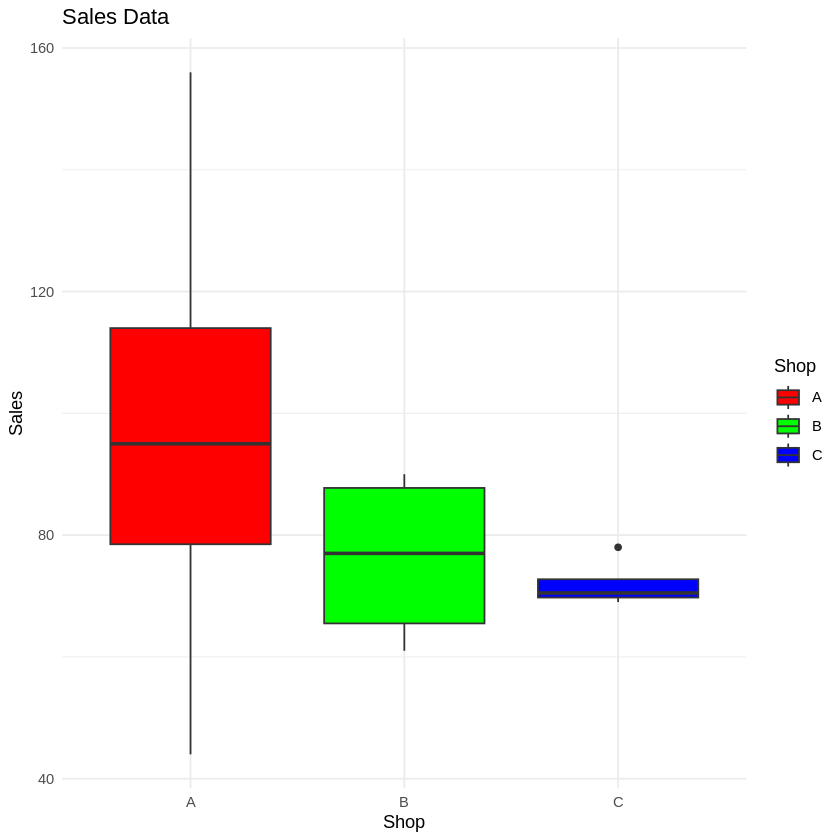

In [ ]:
# 必要なパッケージのロード
library(ggplot2)
library(tidyr)

# データフレームの作成
df_shopsales <- data.frame(month = c('Jan.', 'Feb.', 'Mar.', 'Apr.'),
                           A = c(156, 90, 100, 44),
                           B = c(67, 87, 61, 90),
                           C = c(78, 70, 71, 69))

# データを長い形式に変換
df_long <- pivot_longer(df_shopsales, cols = -month, names_to = "Shop", values_to = "Sales")

# 箱ひげ図の描画
ggplot(df_long, aes(x = Shop, y = Sales, fill = Shop)) +
  geom_boxplot() +
  scale_fill_manual(values = rainbow(3)) +
  labs(title = "Sales Data", x = "Shop", y = "Sales") +
  theme_minimal()

### **4.5 折れ線グラフ**

#### **4.5.1 Base R**



このRコードでは、seq 関数を使って -5 から 5 までの範囲で等間隔の数値を生成し、plot 関数で正弦波をプロットしています。その後、lines 関数を使って同じグラフに余弦波を追加し、legend 関数でグラフに凡例を追加しています。ylim を指定することで y 軸の範囲を設定し、すべてのプロットが適切に表示されるようにしています。

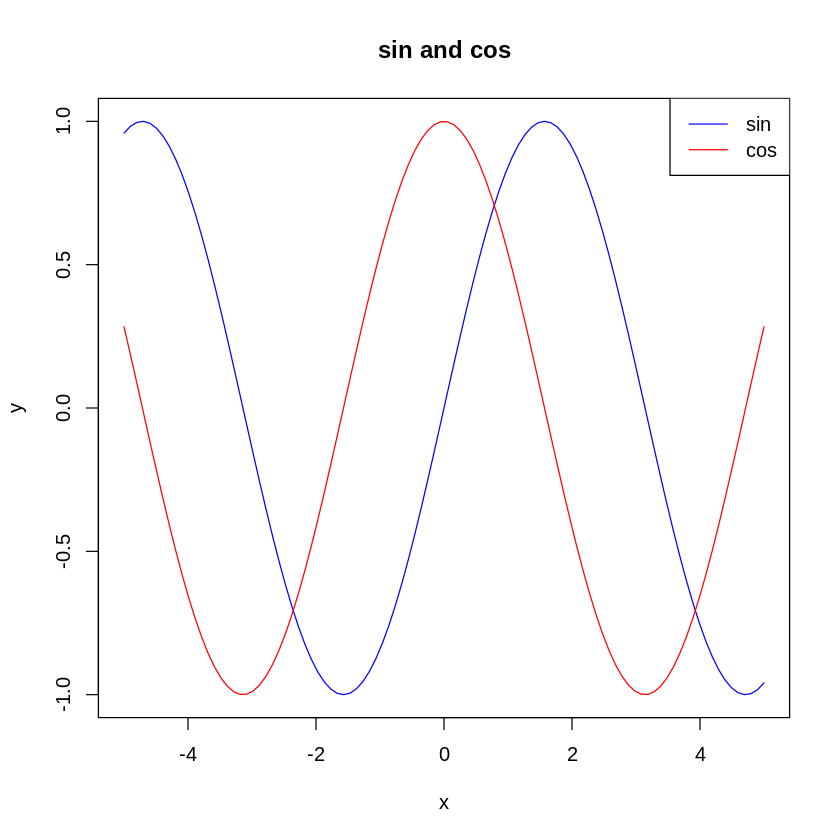

In [ ]:
# -5から5までの範囲で100の等間隔な数値を生成
x <- seq(-5, 5, length.out = 100)
# 正弦波をプロット
plot(x, sin(x), type = "l", col = "blue", ylim = c(-1, 1), ylab = "y", xlab = "x", main = "sin and cos")
# 余弦波を同じグラフに追加
lines(x, cos(x), type = "l", col = "red")
# 凡例を追加
legend("topright", legend = c("sin", "cos"), col = c("blue", "red"), lty = 1)


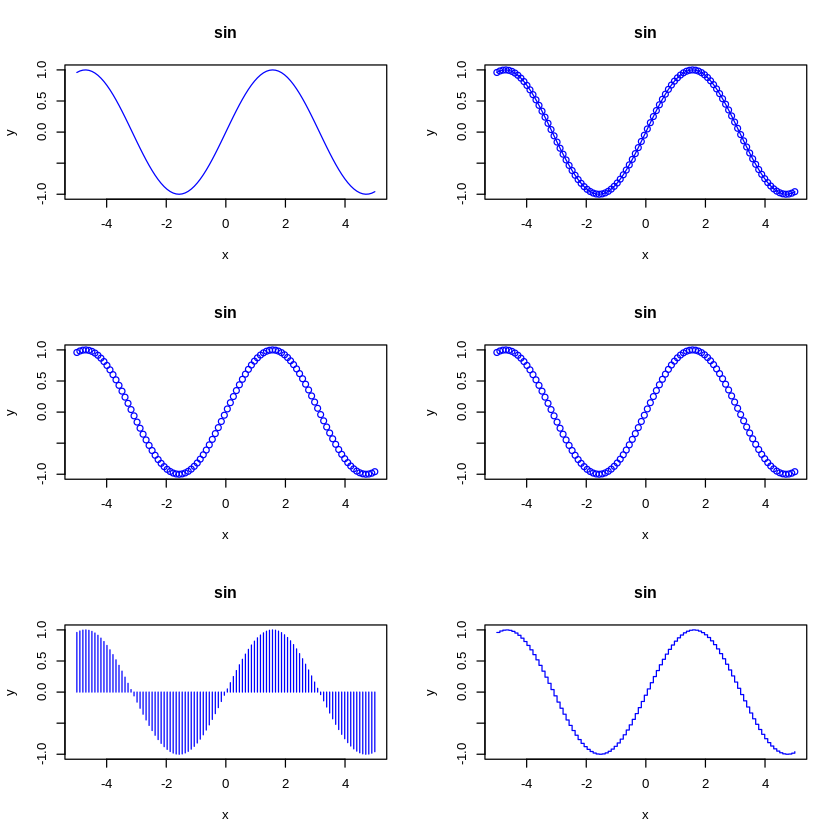

In [ ]:
# -5から5までの範囲で100の等間隔な数値を生成
x <- seq(-5, 5, length.out = 100)

par(mfrow = c(3,2))  #　図をn行m列に並べるためのおまじない
plot(x, sin(x), type = "l", col = "blue", ylim = c(-1, 1), ylab = "y", xlab = "x", main = "sin") # 折れ線グラフ
plot(x, sin(x), type = "o", col = "blue", ylim = c(-1, 1), ylab = "y", xlab = "x", main = "sin") # 点と折れ線
plot(x, sin(x), type = "b", col = "blue", ylim = c(-1, 1), ylab = "y", xlab = "x", main = "sin") # 点と折れ線
plot(x, sin(x), type = "p", col = "blue", ylim = c(-1, 1), ylab = "y", xlab = "x", main = "sin") # 点だけ
plot(x, sin(x), type = "h", col = "blue", ylim = c(-1, 1), ylab = "y", xlab = "x", main = "sin") # 縦線
plot(x, sin(x), type = "s", col = "blue", ylim = c(-1, 1), ylab = "y", xlab = "x", main = "sin") # 階段

次のRのソースコードは、時系列データのサンプルを生成し、それを折れ線グラフとして描画するものです。以下にソースコードの解説を示します：

- `set.seed(123)`: 乱数生成のシードを設定します。これにより、再現可能な乱数が生成されます。シードを設定することで、同じシードを使用する場合には常に同じ乱数が生成されます。

- `time <- seq(1, 100, by = 1)`: 1から100までの整数のシーケンスを生成し、それを`time`という変数に格納します。これは時間軸を表します。

- `value <- cumsum(rnorm(100))`: 標準正規分布に従う乱数を100個生成し、それらの累積和を計算します。これにより、ランダムな変動を持つ時系列データが生成されます。このデータを`value`という変数に格納します。

- `plot(time, value, type = "l", col = "red", lwd = 2, main = "Base R Line Graph", xlab = "Time", ylab = "Value")`: `plot()`関数を使って折れ線グラフを描画します。`time`をx軸、`value`をy軸にプロットし、折れ線グラフとして表示します。`type = "l"`は線グラフを指定し、`col = "red"`は線の色を赤に、`lwd = 2`は線の太さを2に設定します。`main = "Base R Line Graph"`はグラフのタイトルを指定し、`xlab = "Time"`と`ylab = "Value"`はx軸とy軸のラベルを指定します。

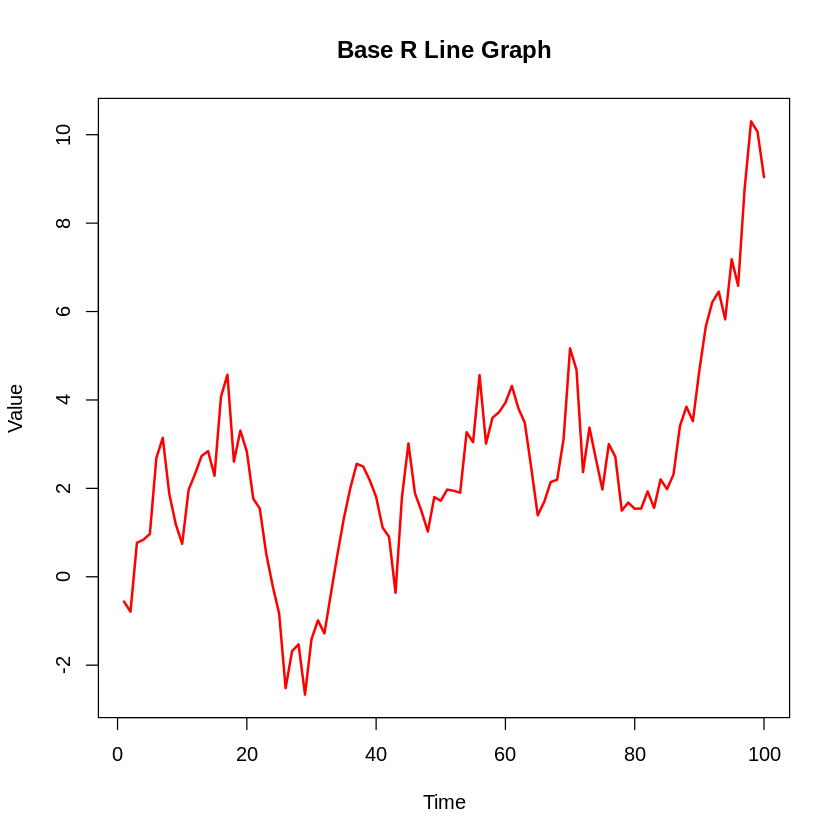

In [ ]:
# 時系列データのサンプル
set.seed(123)
time <- seq(1, 100, by = 1)
value <- cumsum(rnorm(100))

# 折れ線グラフの描画
plot(time, value, type = "l", col = "red", lwd = 2, main = "Base R Line Graph", xlab = "Time", ylab = "Value")

#### **4.5.2 ggplot2**

このコードでは、ggplot2ライブラリを使って正弦波と余弦波を描画し、凡例を追加しています。`geom_line()`関数を使用して線を描画し、`labs()`関数を使用して軸ラベルやグラフのタイトルを設定します。`theme()`関数を使用してグラフのテーマを調整し、`scale_color_manual()`関数を使用して凡例の色とラベルを設定します。

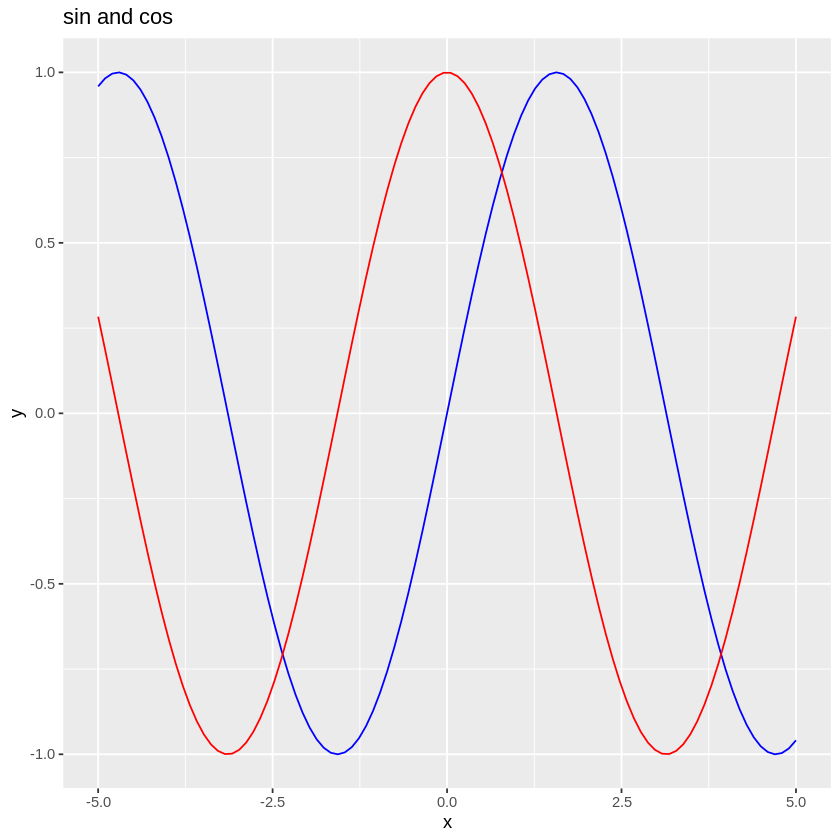

In [ ]:
library(ggplot2)

# -5から5までの範囲で100の等間隔な数値を生成
x <- seq(-5, 5, length.out = 100)

# データフレームを作成
data <- data.frame(x = x, sin = sin(x), cos = cos(x))

# ggplot2でプロット
ggplot(data, aes(x = x)) +
  geom_line(aes(y = sin), color = "blue") +  # 正弦波をプロット
  geom_line(aes(y = cos), color = "red") +   # 余弦波をプロット
  ylim(-1, 1) +                               # y軸の範囲を設定
  labs(x = "x", y = "y",                      # x軸とy軸のラベルを設定
       title = "sin and cos") +               # グラフのタイトルを設定
  theme_gray() +                           # グラフのテーマを設定
  theme(legend.position = "topright") +       # 凡例の位置を指定
  scale_color_manual(values = c("blue", "red"),   # 凡例の色を指定
                     labels = c("sin", "cos"))     # 凡例のラベルを指定


下のソースコードは、ggplot2を使用して時系列データを折れ線グラフとして描画するものです。

- `set.seed(123)`: 乱数生成のシードを設定します。これにより、再現可能な乱数が生成されます。
- `time <- seq(1, 100, by = 1)`: 1から100までの整数のシーケンスを生成し、それを`time`という変数に格納します。これは時間軸を表します。

- `value <- cumsum(rnorm(100))`: 標準正規分布に従う乱数を100個生成し、それらの累積和を計算します。これにより、ランダムな変動を持つ時系列データが生成されます。このデータを`value`という変数に格納します。

- `df_time <- data.frame(time = time, value = value)`: `time`と`value`を列として持つデータフレーム`df_time`を作成します。

- `ggplot(df_time, aes(x = time, y = value)) +`: ggplot2を使用してグラフを作成します。`df_time`をデータとして指定し、x軸には`time`を、y軸には`value`を指定します。

- `geom_line(color = "red", linewidth = 1) +`: `geom_line()`を使用して折れ線グラフを描画します。線の色を赤に、線の幅を1に設定します。

- `ggtitle("ggplot2 Line Graph") + xlab("Time") + ylab("Value")`: グラフのタイトル、x軸ラベル、y軸ラベルをそれぞれ設定します。

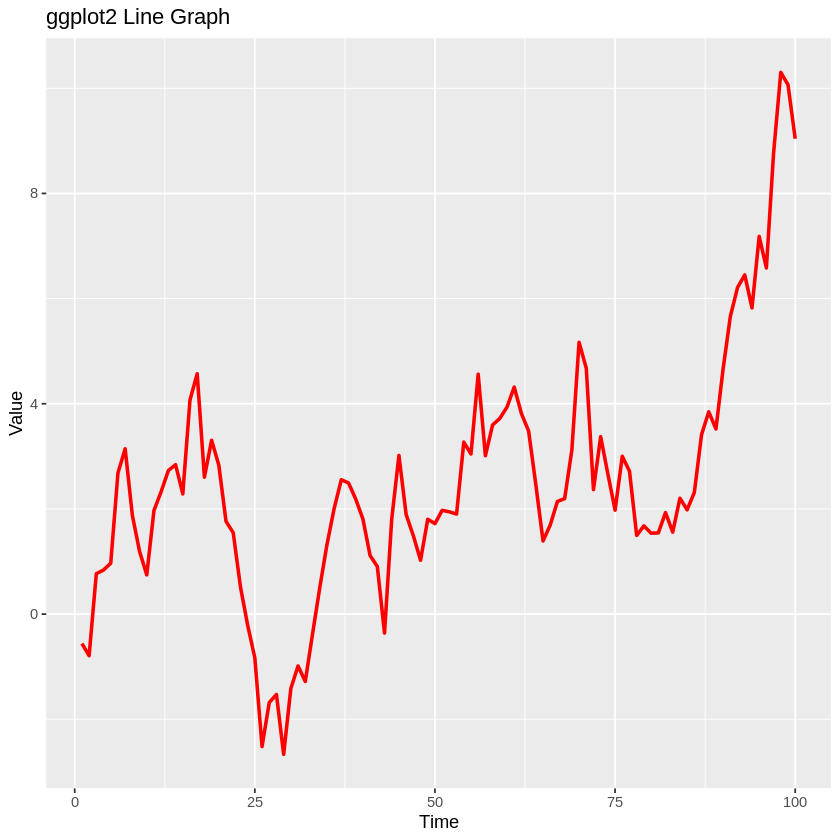

In [ ]:
# 時系列データのサンプル
set.seed(123)
time <- seq(1, 100, by = 1)
value <- cumsum(rnorm(100))

df_time <- data.frame(time = time, value = value)

# 折れ線グラフの描画
ggplot(df_time, aes(x = time, y = value)) +
  geom_line(color = "red", linewidth = 1) +
  ggtitle("ggplot2 Line Graph") +
  xlab("Time") +
  ylab("Value")

### **4.6 棒グラフ**

#### **4.6.1 Base R**

このRのソースコードは、条件（カテゴリ）とその値を設定し、それらを棒グラフとして描画するものです。このRコードでは、`barplot` 関数を使ってカテゴリ（condition）に対する値（value）を棒グラフとして描画しています．第一引数には各棒の高さを指定するベクトル`value`を渡します。`names.arg`引数には各棒のラベルとして使用するカテゴリを指定します。`col = "blue"`は棒の色を青に設定し、`xlab = "Condition"`と`ylab = "Value"`はx軸とy軸のラベルを指定します。`main = "Bar Plot"`はグラフのタイトルを指定します。

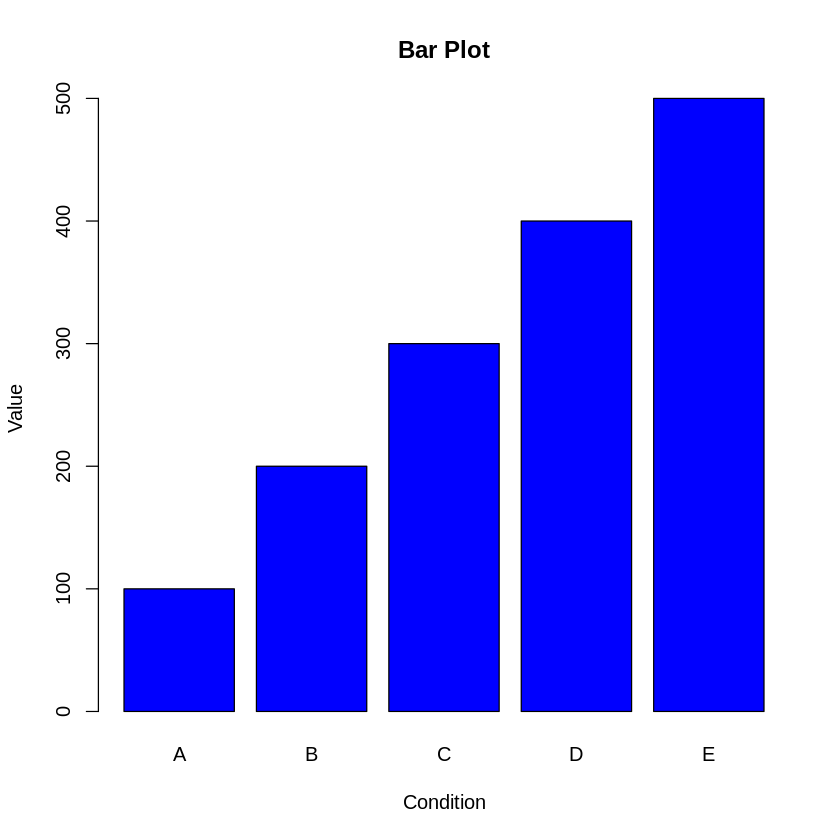

In [ ]:
# 条件（カテゴリ）と値を設定
condition <- c("A", "B", "C", "D", "E")
value <- c(100, 200, 300, 400, 500)

# 棒グラフを描画
barplot(value, names.arg = condition, col = "blue", xlab = "Condition", ylab = "Value", main = "Bar Plot")


このRコードでは、rbind を使用して value1 と value2 を行列として束ね、barplot 関数に渡すことで積み上げ棒グラフを作成しています。beside = FALSE は棒を横に並べるのではなく、積み上げるための設定です。names.arg でX軸のラベルを指定し、col で棒の色を設定しています。legend.text と args.legend を使って凡例を追加し、その位置を指定しています。

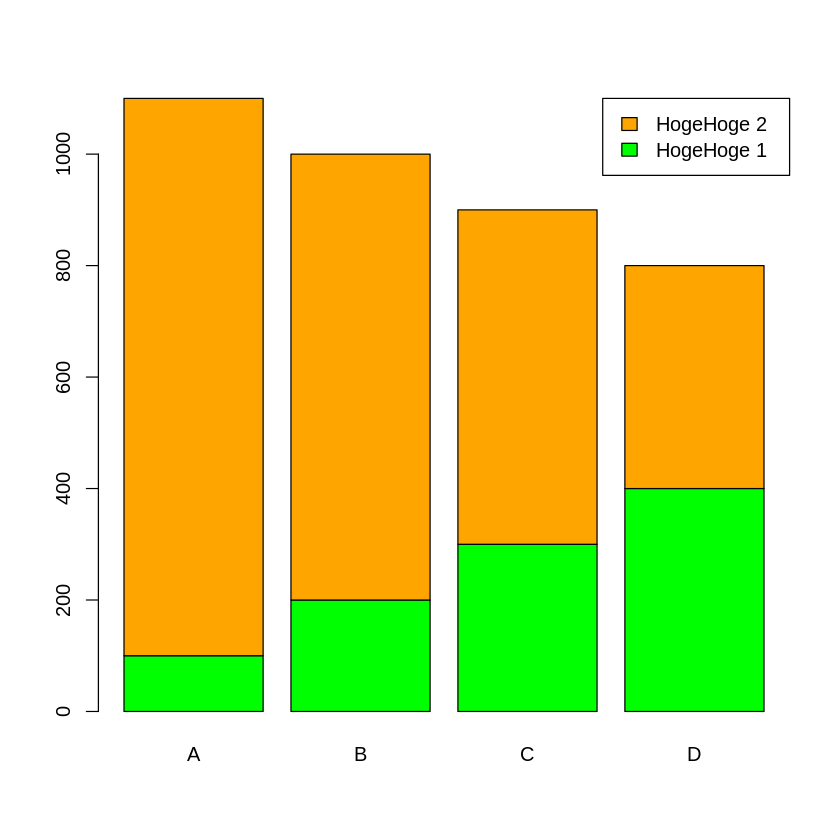

In [ ]:
# カテゴリと値を設定
condition <- c("A", "B", "C", "D")
value1 <- c(100, 200, 300, 400)
value2 <- c(1000, 800, 600, 400)

# 積み上げ棒グラフのデータを準備
values <- rbind(value1, value2)

# 棒グラフを描画
barplot(values, beside = FALSE, names.arg = condition, col = c("green", "orange"),
        legend.text = c("HogeHoge 1", "HogeHoge 2"), args.legend = list(x = "topright"))


このRコードでは、まずdata.frameを使ってデータフレームを作成し、barplot関数で棒グラフを描画しています。as.matrix(df_shopsales[,-1])により、月を除いたデータフレームの部分を行列に変換しています。beside = TRUEオプションにより、棒を並べて表示し、names.argで月の名前をX軸に、colで棒の色を指定しています。legendで凡例を追加し、title関数でグラフのタイトルと軸ラベルを設定しています。

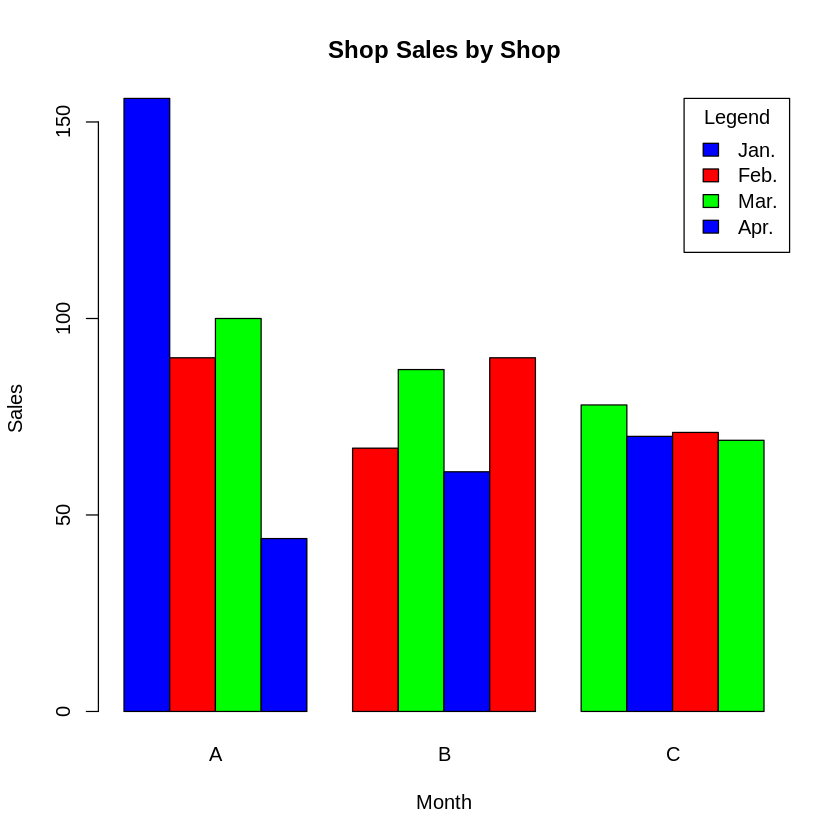

In [ ]:
# データフレームの作成
df_shopsales <- data.frame(month = c('Jan.', 'Feb.', 'Mar.', 'Apr.'),
                           A = c(156, 90, 100, 44),
                           B = c(67, 87, 61, 90),
                           C = c(78, 70, 71, 69))

# 行列への変換と月名の順序を保持
sales_matrix <- as.matrix(df_shopsales[,-1])
row.names(sales_matrix) <- df_shopsales$month

# 棒グラフの描画
barplot(sales_matrix,
        beside = TRUE,
        col = c("blue", "red", "green"),
        legend.text = TRUE,
        args.legend = list(title = "Legend", x = "topright"))

# グラフのタイトルと軸ラベルの追加
title(main = "Shop Sales by Shop", xlab = "Month", ylab = "Sales")


#### **4.6.2 ggplot2**

ggplot2を使用して同じ棒グラフを作成するためには、まずデータを`data.frame`形式に変換する必要があります。次に、`ggplot`関数にデータとエステティックマッピング（aes）を渡し、`geom_bar`を使って棒グラフを描画します。

このコードでは、まず`ggplot`関数にデータフレーム`df`とエステティックマッピング（`aes`）を指定しています。エステティックマッピングでは、x軸に条件（`condition`）、y軸に値（`value`）を設定しています。`fill = condition`を指定していますが、ここでは全てのバーを同じ色（青）で塗りつぶしているため、実際には凡例が不要です。そのため、`theme`関数を使用して凡例を非表示にしています。

`geom_bar`関数で`stat = "identity"`を指定することで、y軸の値が`value`列の値に直接対応するようにしています。`color`と`fill`オプションで棒の境界線と塗りつぶしの色を青に設定しています。

最後に、`labs`関数を使って軸ラベルとグラフのタイトルを設定し、`theme_minimal`を使ってシンプルなデザインにしています。

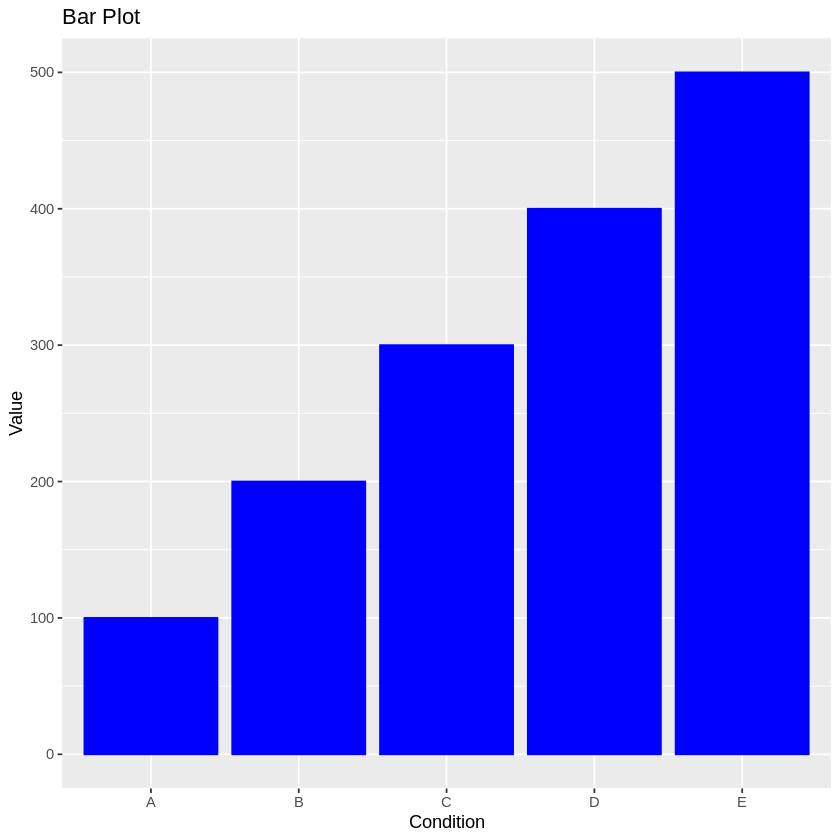

In [ ]:
# 必要なパッケージをロード
library(ggplot2)

# データフレームを作成
df <- data.frame(condition = c("A", "B", "C", "D", "E"),
                 value = c(100, 200, 300, 400, 500))

# ggplot2を使用して棒グラフを描画
ggplot(df, aes(x = condition, y = value, fill = condition)) +
  geom_bar(stat = "identity", color = "blue", fill = "blue") +
  labs(x = "Condition", y = "Value", title = "Bar Plot") +
  theme_minimal() +
  theme(legend.position = "none") # 凡例を非表示にする


次にggplot2を使って積み上げ棒グラフを描画します。

- **ライブラリの読み込み**: ggplot2とtidyrパッケージをロードします。これらは、データの操作と可視化に必要です。

- **データフレームの作成**: `condition`列にカテゴリ（A, B, C, D）を、`value1`と`value2`列にそれぞれのカテゴリに対応する値を格納したデータフレーム`df`を作成します。

- **データの変換**: `pivot_longer`関数を使用して、データフレーム`df`を「長い形式」に変換します。これにより、`condition`列がカテゴリを表し、新しく作成された`category`列が元の`value1`と`value2`列を識別し、`value`列がその値を持つようになります。

- **カテゴリ名の変更**: `factor`関数を使用して、`category`列の因子レベル（ここでは`value1`と`value2`）を「HogeHoge 1」と「HogeHoge 2」に変更します。これにより、データ内のカテゴリ名が読みやすくなります。

- **積み上げ棒グラフの描画**: `ggplot`関数に変換されたデータ`df_long`を渡し、x軸に`condition`、y軸に`value`、塗りつぶしに`category`を指定します。`geom_bar`関数を使い、`stat="identity"`で値を直接表示し、`position="stack"`で積み上げ型の棒グラフを描画します。各カテゴリ（「HogeHoge 1」と「HogeHoge 2」）の色は、`scale_fill_manual`関数で指定します。

- **グラフの調整**: `labs`関数で軸ラベルとグラフタイトルを設定し、`theme_minimal`でシンプルなデザインを適用します。さらに、`theme`関数で凡例の位置を調整し、`guides`関数で凡例のタイトルを非表示にします。

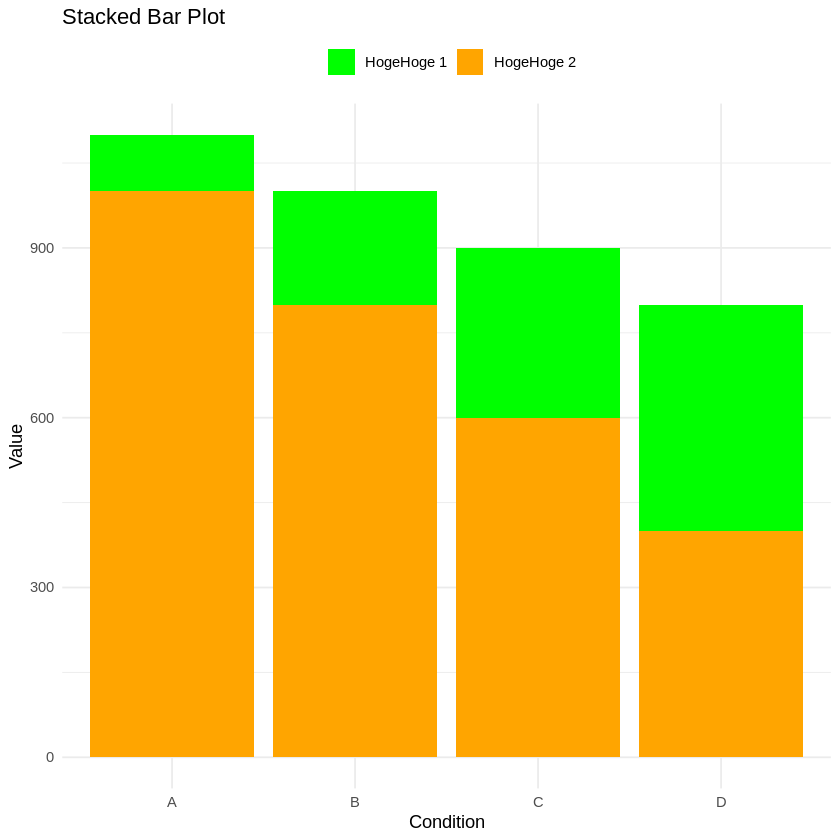

In [ ]:
# 必要なライブラリをロード
library(ggplot2)
library(tidyr)

# 元のデータフレームを作成
df <- data.frame(condition = c("A", "B", "C", "D"),
                 value1 = c(100, 200, 300, 400),
                 value2 = c(1000, 800, 600, 400))

# 長い形式に変換
df_long <- pivot_longer(df, cols = -condition, names_to = "category", values_to = "value")

# カテゴリ名をリネーム（recodeの代わりにfactorを使用）
df_long$category <- factor(df_long$category, levels = c("value1", "value2"),
                           labels = c("HogeHoge 1", "HogeHoge 2"))

# ggplot2を使用して積み上げ棒グラフを描画
ggplot(df_long, aes(x = condition, y = value, fill = category)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = c("HogeHoge 1" = "green", "HogeHoge 2" = "orange")) +
  labs(x = "Condition", y = "Value", title = "Stacked Bar Plot") +
  theme_minimal() +
  theme(legend.position = "top") +
  guides(fill = guide_legend(title = NULL))


下のコードは、店舗別の月間販売データを含むデータフレームから、店舗ごとに月間販売量を示す積み上げ棒グラフをggplot2を使用して描画します。

-  **データの準備**: `tidyr`パッケージの`pivot_longer`関数を使って、データフレーム`df_shopsales`を「長い形式」に変換します。これにより、各行が特定の店舗と月の組み合わせに対応し、対応する販売量を示すようになります。

- **月の順序設定**: 変換後のデータフレームで、`month`列を因子として扱い、そのレベルを'Jan.', 'Feb.', 'Mar.', 'Apr.'の順に設定します。これにより、グラフ上の月をこの順序で表示します。

- **グラフの描画**: `ggplot2`を用いて、変換されたデータを基に棒グラフを描画します。x軸には店舗名を、y軸には販売量を配置し、`fill`エステティックを月で指定して、異なる月を色分けします。`position = "dodge"`オプションを使用して、同一店舗内の異なる月のデータを横に並べて表示します。

- **見た目の調整**: `scale_fill_brewer`で色のパレットを指定し、グラフのタイトル、軸ラベル、凡例の設定を行い、`theme_minimal`でシンプルなデザインを適用します。


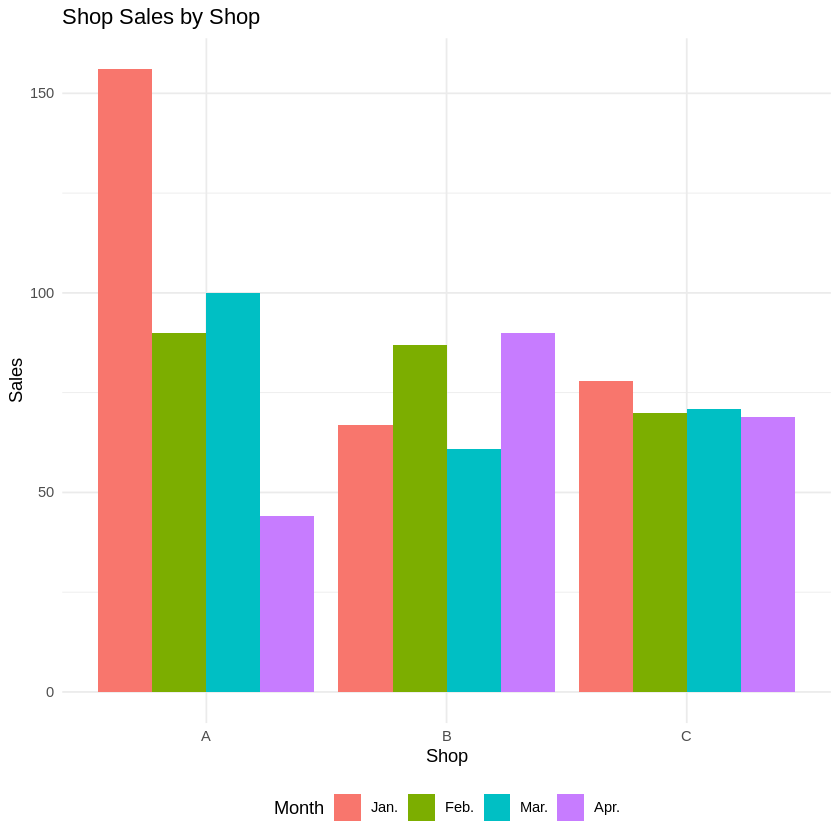

In [ ]:
# 必要なライブラリをロード
library(ggplot2)
library(tidyr)

# データフレームの作成
df_shopsales <- data.frame(month = c('Jan.', 'Feb.', 'Mar.', 'Apr.'),
                           A = c(156, 90, 100, 44),
                           B = c(67, 87, 61, 90),
                           C = c(78, 70, 71, 69))

# データフレームを長い形式に変換
df_long <- pivot_longer(df_shopsales, cols = -month, names_to = "Shop", values_to = "Sales")

# 月を因子として扱い、レベルを指定する
df_long$month <- factor(df_long$month, levels = c('Jan.', 'Feb.', 'Mar.', 'Apr.'))

# ggplot2を使用して棒グラフを描画
ggplot(df_long, aes(x = Shop, y = Sales, fill = month)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Shop Sales by Shop", x = "Shop", y = "Sales", fill = "Month") +
  theme_minimal() +
  theme(legend.position = "bottom")



### **4.7 円グラフ**

#### **4.7.1 Base R**

- `order(data, decreasing = TRUE)`: これにより、`data`ベクトルの要素を降順にソートした際のインデックスが返されます。`decreasing = TRUE`パラメータが降順ソートを指示します。
- `data[ordered_indices]` と `labels[ordered_indices]`: ソートされたインデックスを使用して、データとラベルの両方を多い順に並び替えます。
- その後、`pie`関数を使用して円グラフ（パイチャート）を描画し、`init.angle`と`clockwise`パラメータを使用して12時の位置から時計回りにセグメントを表示します。
- 最後に、`legend`関数を使用して、ソートされたデータに対応する凡例を追加します。


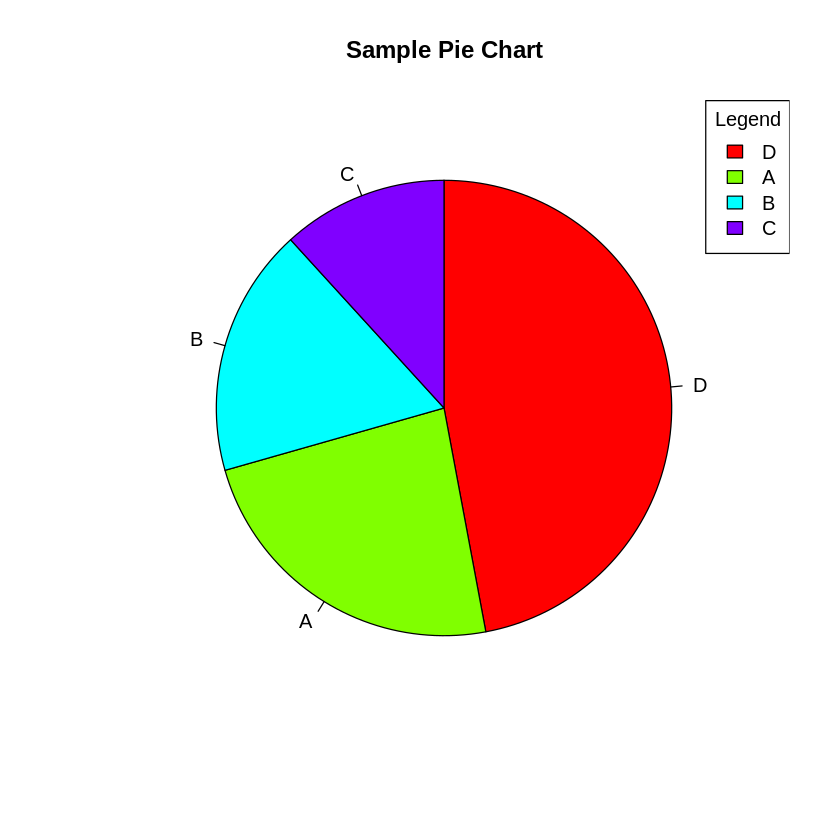

In [ ]:
# サンプルデータの作成
data <- c(40, 30, 20, 80)
labels <- c("A", "B", "C", "D")

# データを多い順（降順）に並び替え
ordered_indices <- order(data, decreasing = TRUE)
ordered_data <- data[ordered_indices]
ordered_labels <- labels[ordered_indices]

# パイチャートの描画（降順、12時の位置から開始）
pie(ordered_data, labels = ordered_labels, main = "Sample Pie Chart", col = rainbow(length(ordered_data)),
    init.angle = 90, clockwise = TRUE)

# 凡例の追加
legend("topright", legend = ordered_labels, fill = rainbow(length(ordered_data)), title = "Legend")

#### **4.7.2 ggplot2**

なんとggplot2は円グラフをサポートしてません！円グラフなんて使うなという強い意志を感じますね．

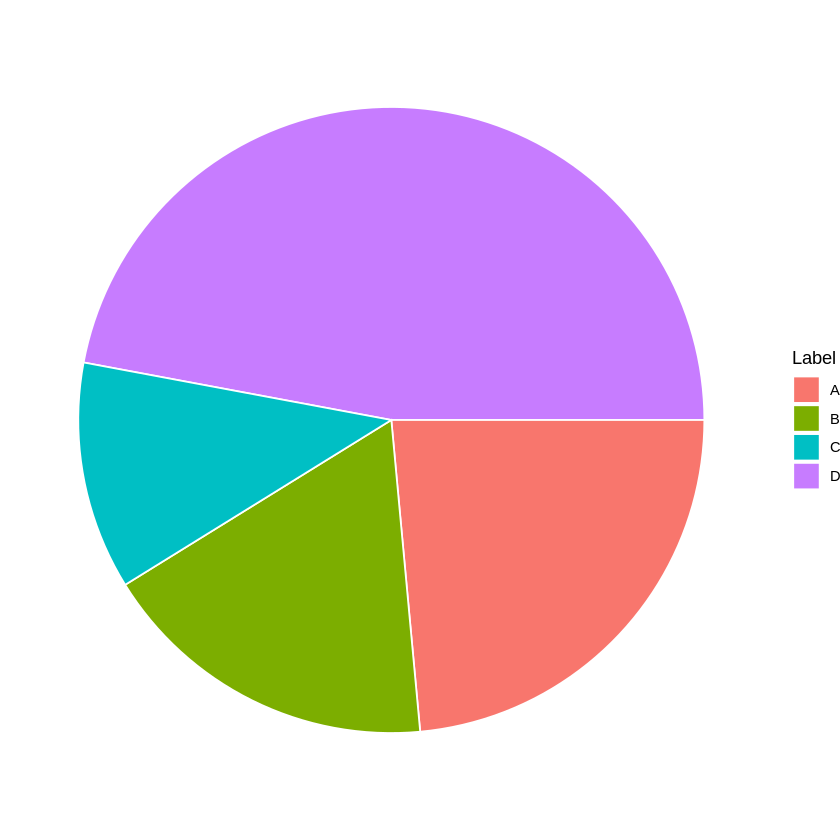

In [ ]:
library(ggplot2)

# サンプルデータの作成
df <- data.frame(
  label = c("A", "B", "C", "D"),
  value = c(40, 30, 20, 80)
)

# データを値に基づいて降順に並び替え
df <- df[order(df$value, decreasing = TRUE),]

# パイチャートの描画
ggplot(df, aes(x = "", y = value, fill = label)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = -pi/2, direction = -1) +
  theme_void() +
  labs(fill = "Label") +
  theme(legend.position = "right")


### **4.8 その他のグラフ**

`iris`データセットは、3種類のアヤメ（Setosa、Versicolour、Virginica）の各50サンプルに関するデータを含んでいます。このデータセットには、花びらの長さ（Petal.Length）、花びらの幅（Petal.Width）、がく片の長さ（Sepal.Length）、およびがく片の幅（Sepal.Width）の4つの数値特性が記録されています。これらの特徴を基に、機械学習の分類問題やデータ分析の教材として広く使用されてます。いくつか作図例を示します．

#### **4.8.1 Base R**

In [ ]:
# irisデータセットを読み込んで冒頭だけ表示
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


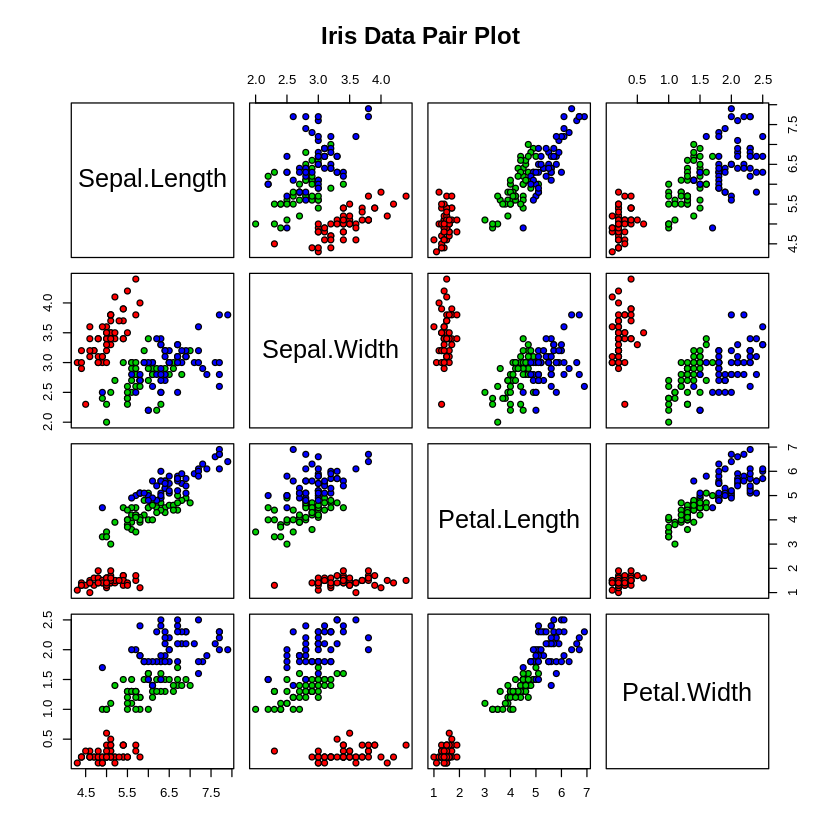

In [ ]:
# ペアプロットを表示
pairs(iris[,1:4], main="Iris Data Pair Plot", pch=21,
      bg=c("red","green3","blue")[unclass(iris$Species)])


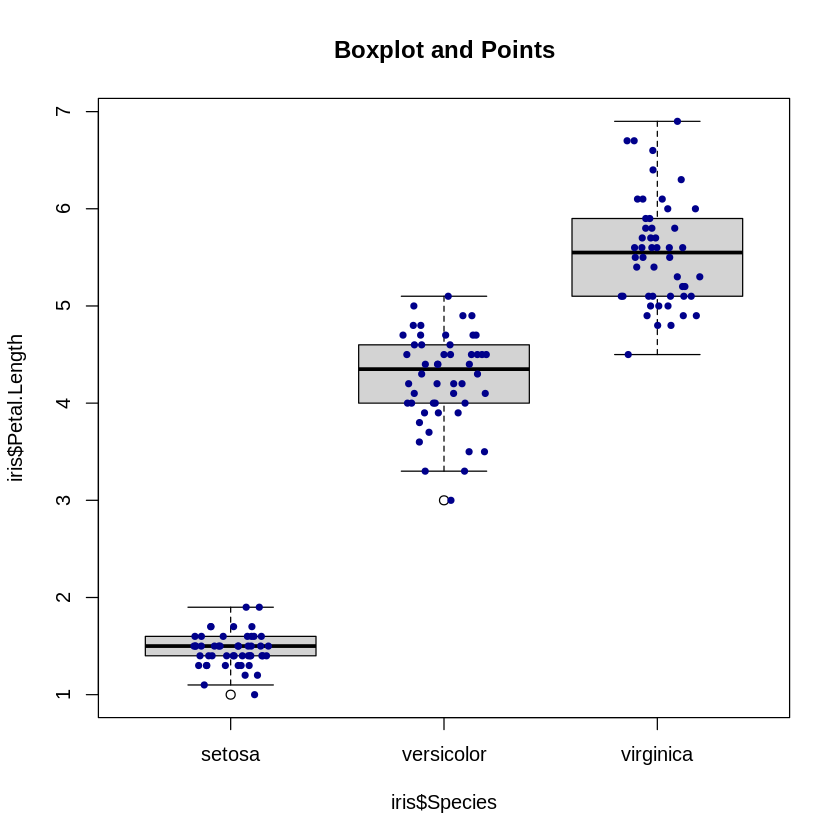

In [ ]:
# 箱ひげ図と点のプロットを組み合わせたプロットをSpeciesごとのPetal.Lengthで表示
boxplot(iris$Petal.Length ~ iris$Species, col="lightgray", main="Boxplot and Points")
points(jitter(as.numeric(iris$Species)), iris$Petal.Length, col="darkblue", pch=20)

#### **4.8.2 ggplot2**

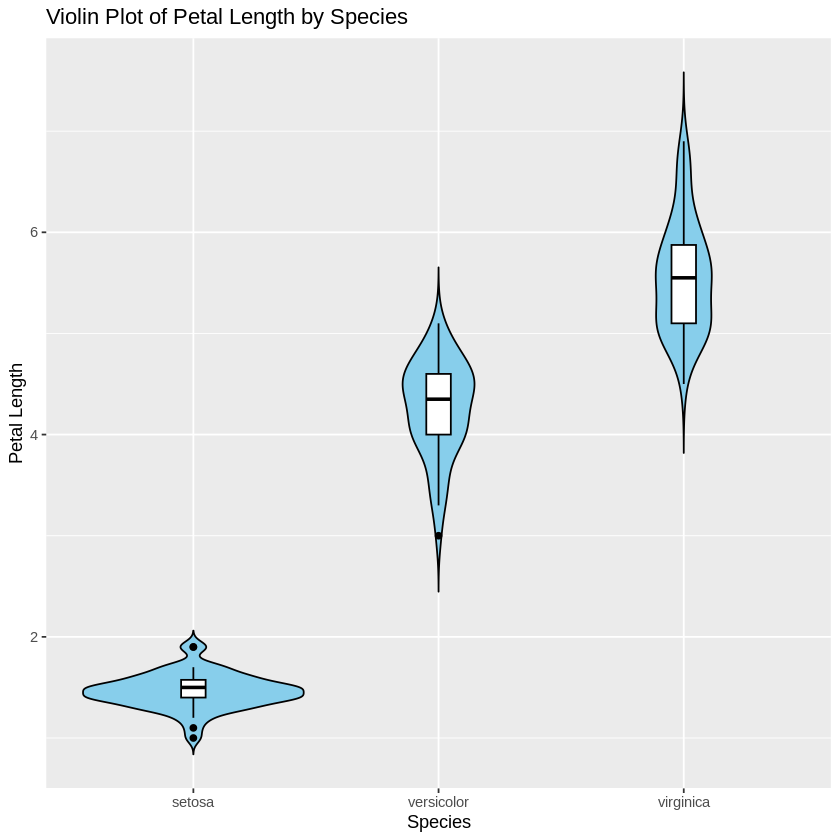

In [ ]:
# irisデータセット
data(iris)

# パッケージをロード
library(ggplot2)

# バイオリンプロット
ggplot(iris, aes(x=Species, y=Petal.Length)) +
  geom_violin(trim=FALSE, fill="skyblue", color="black") +
  geom_boxplot(width=0.1, fill="white", color="black") +

  labs(title="Violin Plot of Petal Length by Species", x="Species", y="Petal Length")


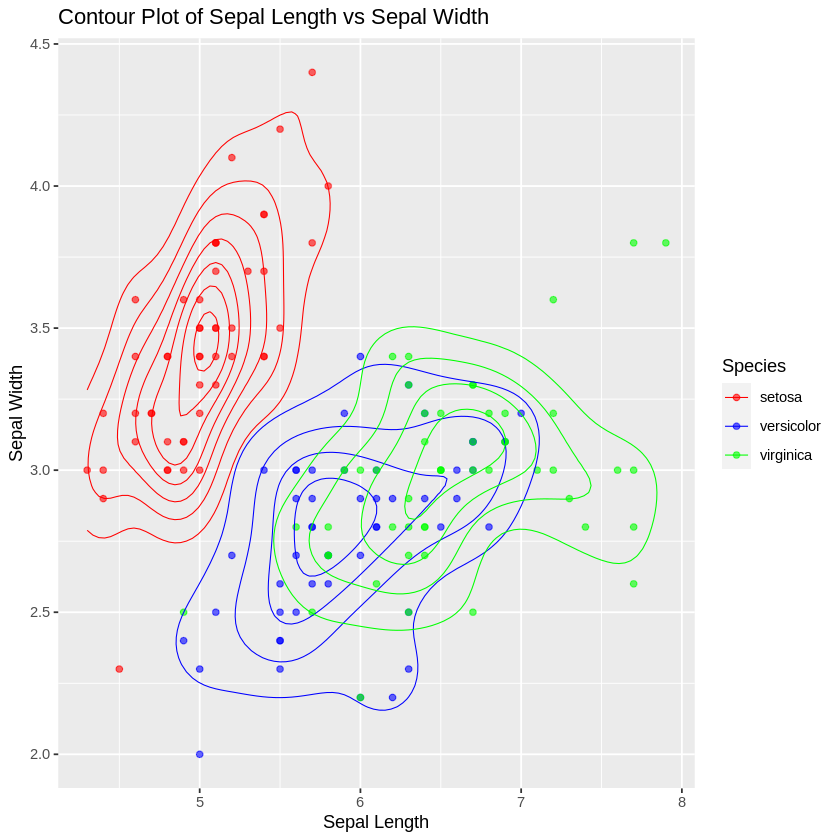

In [ ]:
# 等高線プロットの作成
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width)) +
  geom_point(aes(color = Species), alpha = 0.6) +  # 散布図をプロット
  geom_density_2d(aes(color = Species), size = 0.3) +  # 等高線を追加
  scale_color_manual(values = c("setosa" = "red", "versicolor" = "blue", "virginica" = "green")) +  # 種ごとに色を設定
  labs(title = "Contour Plot of Sepal Length vs Sepal Width",
       x = "Sepal Length", y = "Sepal Width")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


`geom_smooth()` using formula = 'y ~ x'


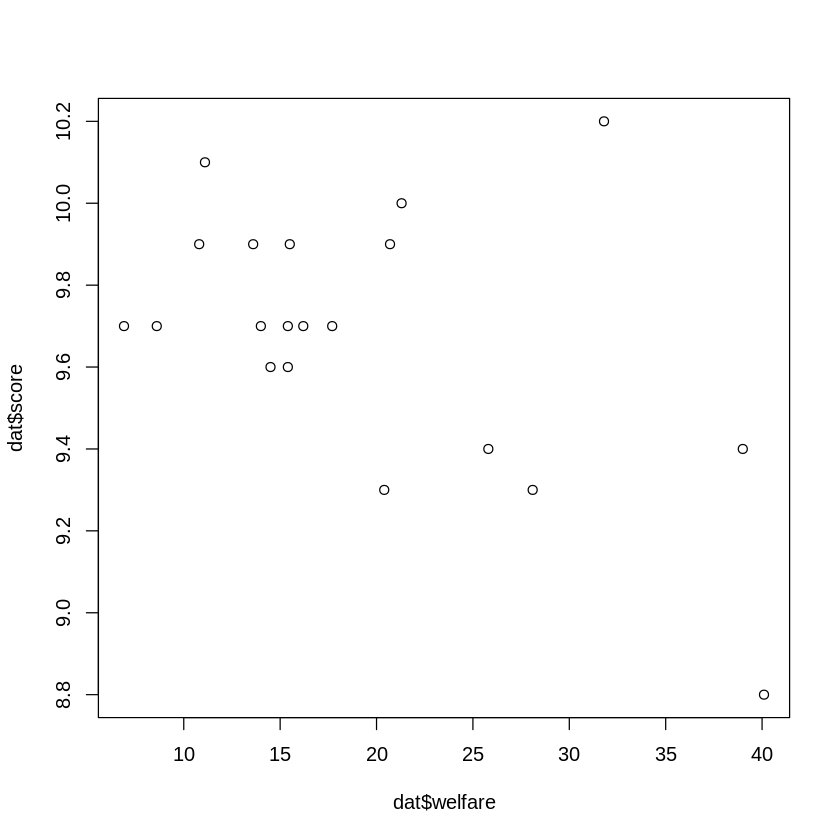

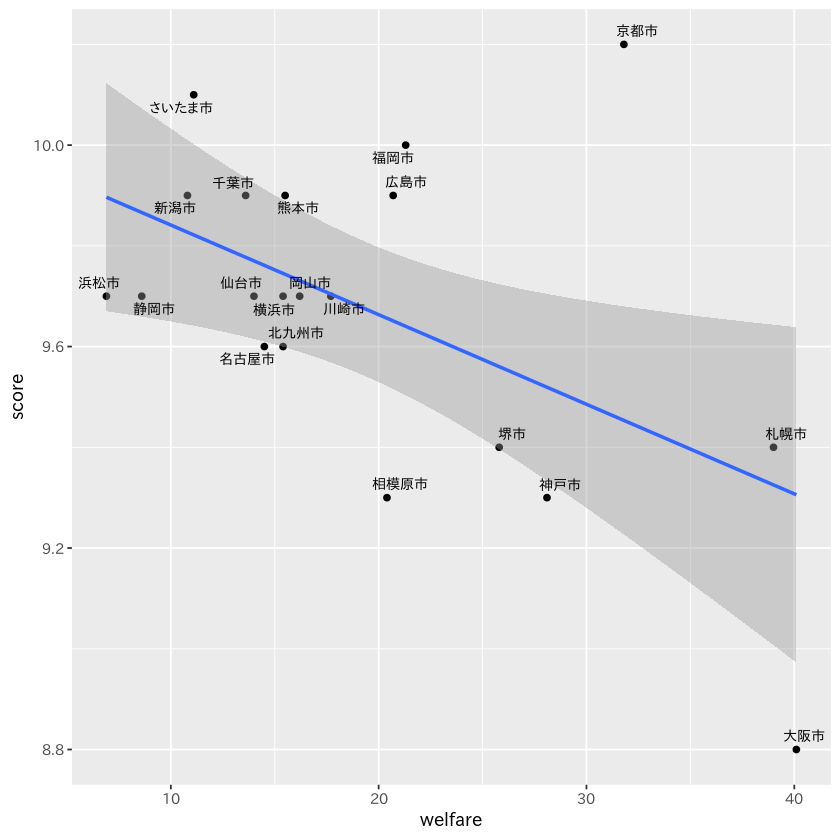

In [ ]:
#  日本語フォントを使う際のおまじない（WindowsやMacなら必要ない）
system('sudo apt install -y fonts-ipafont')

# パッケージインストールのおまじない
targetPackages <- c('ggplot2','ggrepel')
newPackages <- targetPackages[!(targetPackages %in% installed.packages()[,"Package"])]
if(length(newPackages)) install.packages(newPackages)

# 散布図
# 生活保護と学力
#　データフレーム（関連するデータをまとめたもの）を作成する
dat <- data.frame(
  city = c("札幌市","仙台市","さいたま市","千葉市","横浜市","川崎市","相模原市",
           "新潟市","静岡市","浜松市","名古屋市","京都市","大阪市","堺市","神戸市",
           "岡山市","広島市","北九州市","福岡市","熊本市"),
  welfare = c(39,14,11.1,13.6,15.4,17.7,20.4,10.8,8.6,6.9,14.5,31.8,40.1,25.8,
              28.1,16.2,20.7,15.4,21.3,15.5),
  score = c(9.4,9.7,10.1,9.9,9.7,9.7,9.3,9.9,9.7,9.7,9.6,10.2,8.8,9.4,9.3,9.7,
            9.9,9.6,10.0,9.9)
)

# 普通の散布図(datという名前のデータフレームのうちscoreだけを取りだすときは
# dat$scoreと書く
plot(dat$welfare, dat$score)

# 散布図(もうちょっと凝ったやつ)
library(ggplot2)
library(ggrepel)
g <- ggplot(dat, aes(x = welfare, y = score))
g <- g + geom_point()+ geom_smooth(method = "lm")
g <- g + theme_gray (base_family= "IPAPGothic")
g <- g + geom_text_repel(aes(label = city), size = 3)
plot(g)